In [41]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        break

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mlub-learning-to-count/train.txt
/kaggle/input/mlub-learning-to-count/test/test/test_composite000000426.png
/kaggle/input/mlub-learning-to-count/train/train/train_composite000012068.png


In [42]:
df_train = pd.read_csv('/kaggle/input/mlub-learning-to-count/train.txt',sep=' ',header=None)
print(df_train.shape)
# take only the first 200 images
#df_train = df_train.head(500)

(15000, 2)


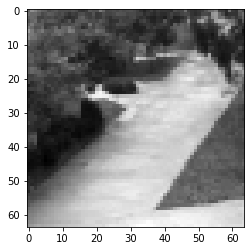

In [43]:
import imageio
from skimage import transform,io
import matplotlib.pyplot as plt
# read images and store into a np array

data_dir = '/kaggle/input/mlub-learning-to-count/train/'
im_size = 64
N = df_train.shape[0]
X = np.zeros((N, im_size,im_size))
y = np.zeros((N))
cont =0

for ind, item in df_train.iterrows():
    im       = imageio.imread(data_dir + item[0])/255.
    small_im = transform.resize(im, (im_size,im_size), mode='symmetric', preserve_range=True)
    X[cont, :,:] = small_im
    y[cont] = item[1]
    cont+=1

plt.imshow(small_im,cmap='gray')
plt.show()

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val= train_test_split(X, y, test_size=0.3, random_state=66)

In [45]:
from sklearn.ensemble import RandomForestRegressor
# random forest model 
'''rfc = RandomForestRegressor()
rfc.fit(X_train.reshape((X_train.shape[0],-1)),y_train)
# predictions
rfc_predict = rfc.predict(X_val.reshape((X_val.shape[0],-1)))
'''

'rfc = RandomForestRegressor()\nrfc.fit(X_train.reshape((X_train.shape[0],-1)),y_train)\n# predictions\nrfc_predict = rfc.predict(X_val.reshape((X_val.shape[0],-1)))\n'

In [46]:
from sklearn.metrics import mean_squared_error
'''plt.plot(rfc_predict,y_val,'.')

print(np.sqrt(mean_squared_error(rfc_predict,y_val)))'''

"plt.plot(rfc_predict,y_val,'.')\n\nprint(np.sqrt(mean_squared_error(rfc_predict,y_val)))"

In [47]:
import tensorflow as tf
from tensorflow import keras

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)
history = {}

In [48]:
X_train = X_train[..., np.newaxis]
X_val = X_val[..., np.newaxis]

In [49]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

# create the model
model = keras.models.Sequential([
    DefaultConv2D(filters=32, kernel_size=3, input_shape=[64, 64, 1]),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Dropout(0.2),
    DefaultConv2D(filters=64),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Dropout(0.2),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=30, activation='softmax')
])


In [50]:
model.layers

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       7

In [52]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [53]:
history = model.fit(X_train, y_train, epochs=500,
                    validation_data=(X_val, y_val),verbose=1)

Epoch 1/500
329/329 [==============================] - 2s 7ms/step - loss: 3.4555 - accuracy: 0.0361 - val_loss: 3.4015 - val_accuracy: 0.0367
Epoch 2/500
329/329 [==============================] - 2s 7ms/step - loss: 3.4006 - accuracy: 0.0350 - val_loss: 3.4019 - val_accuracy: 0.0367
Epoch 3/500
329/329 [==============================] - 2s 7ms/step - loss: 3.4006 - accuracy: 0.0358 - val_loss: 3.4027 - val_accuracy: 0.0367
Epoch 4/500
329/329 [==============================] - 2s 6ms/step - loss: 3.4004 - accuracy: 0.0373 - val_loss: 3.4023 - val_accuracy: 0.0367
Epoch 5/500
329/329 [==============================] - 2s 6ms/step - loss: 3.4002 - accuracy: 0.0364 - val_loss: 3.4030 - val_accuracy: 0.0367
Epoch 6/500
329/329 [==============================] - 2s 6ms/step - loss: 3.4004 - accuracy: 0.0368 - val_loss: 3.4026 - val_accuracy: 0.0367
Epoch 7/500
329/329 [==============================] - 2s 6ms/step - loss: 3.4002 - accuracy: 0.0363 - val_loss: 3.4024 - val_accuracy: 0.0367

Epoch 58/500
329/329 [==============================] - 2s 6ms/step - loss: 3.3999 - accuracy: 0.0374 - val_loss: 3.4027 - val_accuracy: 0.0367
Epoch 59/500
329/329 [==============================] - 2s 7ms/step - loss: 3.3999 - accuracy: 0.0358 - val_loss: 3.4027 - val_accuracy: 0.0322
Epoch 60/500
329/329 [==============================] - 2s 6ms/step - loss: 3.3999 - accuracy: 0.0359 - val_loss: 3.4027 - val_accuracy: 0.0367
Epoch 61/500
329/329 [==============================] - 2s 6ms/step - loss: 3.3999 - accuracy: 0.0374 - val_loss: 3.4027 - val_accuracy: 0.0367
Epoch 62/500
329/329 [==============================] - 2s 7ms/step - loss: 3.3999 - accuracy: 0.0368 - val_loss: 3.4027 - val_accuracy: 0.0367
Epoch 63/500
329/329 [==============================] - 2s 6ms/step - loss: 3.3999 - accuracy: 0.0370 - val_loss: 3.4027 - val_accuracy: 0.0367
Epoch 64/500
329/329 [==============================] - 2s 6ms/step - loss: 3.4000 - accuracy: 0.0362 - val_loss: 3.4027 - val_accuracy:

Epoch 115/500
329/329 [==============================] - 2s 6ms/step - loss: 3.3999 - accuracy: 0.0374 - val_loss: 3.4026 - val_accuracy: 0.0367
Epoch 116/500
329/329 [==============================] - 2s 6ms/step - loss: 3.3999 - accuracy: 0.0353 - val_loss: 3.4027 - val_accuracy: 0.0367
Epoch 117/500
329/329 [==============================] - 2s 7ms/step - loss: 3.4000 - accuracy: 0.0374 - val_loss: 3.4027 - val_accuracy: 0.0367
Epoch 118/500
329/329 [==============================] - 2s 7ms/step - loss: 3.3999 - accuracy: 0.0374 - val_loss: 3.4026 - val_accuracy: 0.0367
Epoch 119/500
329/329 [==============================] - 2s 6ms/step - loss: 3.3999 - accuracy: 0.0361 - val_loss: 3.4026 - val_accuracy: 0.0367
Epoch 120/500
329/329 [==============================] - 2s 6ms/step - loss: 3.3999 - accuracy: 0.0357 - val_loss: 3.4026 - val_accuracy: 0.0367
Epoch 121/500
329/329 [==============================] - 2s 7ms/step - loss: 3.4000 - accuracy: 0.0363 - val_loss: 3.4026 - val_ac

329/329 [==============================] - 2s 6ms/step - loss: 3.3999 - accuracy: 0.0370 - val_loss: 3.4027 - val_accuracy: 0.0367
Epoch 172/500
329/329 [==============================] - 2s 6ms/step - loss: 3.4000 - accuracy: 0.0374 - val_loss: 3.4027 - val_accuracy: 0.0367
Epoch 173/500
329/329 [==============================] - 2s 6ms/step - loss: 3.4000 - accuracy: 0.0334 - val_loss: 3.4027 - val_accuracy: 0.0367
Epoch 174/500
329/329 [==============================] - 2s 6ms/step - loss: 3.3999 - accuracy: 0.0357 - val_loss: 3.4028 - val_accuracy: 0.0367
Epoch 175/500
329/329 [==============================] - 2s 7ms/step - loss: 3.3999 - accuracy: 0.0351 - val_loss: 3.4028 - val_accuracy: 0.0322
Epoch 176/500
329/329 [==============================] - 2s 7ms/step - loss: 3.3999 - accuracy: 0.0370 - val_loss: 3.4027 - val_accuracy: 0.0367
Epoch 177/500
329/329 [==============================] - 2s 7ms/step - loss: 3.4000 - accuracy: 0.0360 - val_loss: 3.4027 - val_accuracy: 0.0367

329/329 [==============================] - 2s 6ms/step - loss: 3.3999 - accuracy: 0.0374 - val_loss: 3.4028 - val_accuracy: 0.0367
Epoch 228/500
329/329 [==============================] - 2s 7ms/step - loss: 3.4000 - accuracy: 0.0359 - val_loss: 3.4027 - val_accuracy: 0.0367
Epoch 229/500
329/329 [==============================] - 2s 6ms/step - loss: 3.3999 - accuracy: 0.0374 - val_loss: 3.4028 - val_accuracy: 0.0367
Epoch 230/500
329/329 [==============================] - 2s 6ms/step - loss: 3.3999 - accuracy: 0.0362 - val_loss: 3.4027 - val_accuracy: 0.0367
Epoch 231/500
329/329 [==============================] - 2s 6ms/step - loss: 3.3999 - accuracy: 0.0359 - val_loss: 3.4028 - val_accuracy: 0.0367
Epoch 232/500
329/329 [==============================] - 2s 6ms/step - loss: 3.3999 - accuracy: 0.0374 - val_loss: 3.4027 - val_accuracy: 0.0367
Epoch 233/500
329/329 [==============================] - 2s 6ms/step - loss: 3.4000 - accuracy: 0.0359 - val_loss: 3.4028 - val_accuracy: 0.0367

329/329 [==============================] - 2s 6ms/step - loss: 3.3999 - accuracy: 0.0362 - val_loss: 3.4026 - val_accuracy: 0.0367
Epoch 284/500
329/329 [==============================] - 2s 6ms/step - loss: 3.4000 - accuracy: 0.0366 - val_loss: 3.4026 - val_accuracy: 0.0367
Epoch 285/500
329/329 [==============================] - 2s 6ms/step - loss: 3.4000 - accuracy: 0.0361 - val_loss: 3.4026 - val_accuracy: 0.0367
Epoch 286/500
329/329 [==============================] - 2s 6ms/step - loss: 3.4000 - accuracy: 0.0365 - val_loss: 3.4026 - val_accuracy: 0.0367
Epoch 287/500
329/329 [==============================] - 2s 6ms/step - loss: 3.3999 - accuracy: 0.0351 - val_loss: 3.4026 - val_accuracy: 0.0367
Epoch 288/500
329/329 [==============================] - 2s 6ms/step - loss: 3.3999 - accuracy: 0.0354 - val_loss: 3.4027 - val_accuracy: 0.0367
Epoch 289/500
329/329 [==============================] - 2s 6ms/step - loss: 3.4000 - accuracy: 0.0346 - val_loss: 3.4026 - val_accuracy: 0.0367

329/329 [==============================] - 2s 6ms/step - loss: 3.3999 - accuracy: 0.0374 - val_loss: 3.4027 - val_accuracy: 0.0367
Epoch 340/500
329/329 [==============================] - 2s 6ms/step - loss: 3.3999 - accuracy: 0.0365 - val_loss: 3.4026 - val_accuracy: 0.0367
Epoch 341/500
329/329 [==============================] - 2s 6ms/step - loss: 3.3999 - accuracy: 0.0374 - val_loss: 3.4026 - val_accuracy: 0.0367
Epoch 342/500
329/329 [==============================] - 2s 6ms/step - loss: 3.3999 - accuracy: 0.0374 - val_loss: 3.4026 - val_accuracy: 0.0367
Epoch 343/500
329/329 [==============================] - 2s 6ms/step - loss: 3.4000 - accuracy: 0.0369 - val_loss: 3.4026 - val_accuracy: 0.0367
Epoch 344/500
329/329 [==============================] - 2s 6ms/step - loss: 3.4000 - accuracy: 0.0366 - val_loss: 3.4027 - val_accuracy: 0.0367
Epoch 345/500
329/329 [==============================] - 2s 6ms/step - loss: 3.3999 - accuracy: 0.0353 - val_loss: 3.4027 - val_accuracy: 0.0367

329/329 [==============================] - 2s 6ms/step - loss: 3.3999 - accuracy: 0.0374 - val_loss: 3.4028 - val_accuracy: 0.0367
Epoch 396/500
329/329 [==============================] - 2s 6ms/step - loss: 3.3999 - accuracy: 0.0366 - val_loss: 3.4027 - val_accuracy: 0.0322
Epoch 397/500
329/329 [==============================] - 2s 6ms/step - loss: 3.3999 - accuracy: 0.0352 - val_loss: 3.4028 - val_accuracy: 0.0322
Epoch 398/500
329/329 [==============================] - 2s 6ms/step - loss: 3.3999 - accuracy: 0.0364 - val_loss: 3.4027 - val_accuracy: 0.0367
Epoch 399/500
329/329 [==============================] - 2s 6ms/step - loss: 3.3999 - accuracy: 0.0364 - val_loss: 3.4027 - val_accuracy: 0.0322
Epoch 400/500
329/329 [==============================] - 2s 7ms/step - loss: 3.4000 - accuracy: 0.0359 - val_loss: 3.4027 - val_accuracy: 0.0367
Epoch 401/500
329/329 [==============================] - 2s 6ms/step - loss: 3.3999 - accuracy: 0.0363 - val_loss: 3.4027 - val_accuracy: 0.0367

329/329 [==============================] - 2s 6ms/step - loss: 3.4000 - accuracy: 0.0374 - val_loss: 3.4028 - val_accuracy: 0.0367
Epoch 452/500
329/329 [==============================] - 2s 6ms/step - loss: 3.4000 - accuracy: 0.0356 - val_loss: 3.4028 - val_accuracy: 0.0367
Epoch 453/500
329/329 [==============================] - 2s 6ms/step - loss: 3.3999 - accuracy: 0.0374 - val_loss: 3.4028 - val_accuracy: 0.0367
Epoch 454/500
329/329 [==============================] - 2s 6ms/step - loss: 3.3999 - accuracy: 0.0370 - val_loss: 3.4027 - val_accuracy: 0.0367
Epoch 455/500
329/329 [==============================] - 2s 6ms/step - loss: 3.3999 - accuracy: 0.0367 - val_loss: 3.4028 - val_accuracy: 0.0367
Epoch 456/500
329/329 [==============================] - 2s 6ms/step - loss: 3.4000 - accuracy: 0.0370 - val_loss: 3.4028 - val_accuracy: 0.0367
Epoch 457/500
329/329 [==============================] - 2s 6ms/step - loss: 3.3999 - accuracy: 0.0365 - val_loss: 3.4027 - val_accuracy: 0.0367

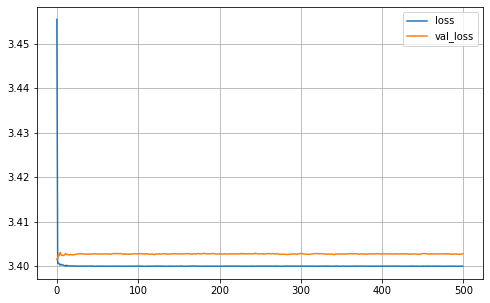

In [54]:
import pandas as pd

pd.DataFrame(history.history)[['loss','val_loss']].plot(figsize=(8, 5))
plt.grid(True)
#plt.gca().set_ylim(0.4, 0.8)
plt.show()

[20. 15. 24. ...  9.  5. 12.]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

14.376269026110743

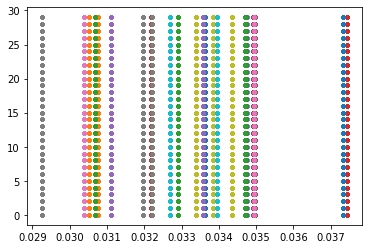

In [55]:
y_model1 = model.predict(X_val)
plt.plot(y_model1,y_val,'.')
print(y_val)
y_model_output = []
for i in y_model1:
    y_model_output.append(np.argmax(i))
print(y_model_output)
np.sqrt(mean_squared_error(y_model_output,y_val))

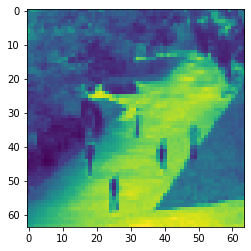

In [56]:
## evaluate test and generate submission
test_dir = '/kaggle/input/mlub-learning-to-count/test/test/'
im_size = 64
N = 500
X_test = np.zeros((N, im_size,im_size))
cont =0

for x in range(500):
    im       = imageio.imread(test_dir + 'test_composite'+str(x).zfill(9) + '.png')/255.
    small_im = transform.resize(im, (im_size,im_size), mode='symmetric', preserve_range=True)
    X_test[cont, :,:] = small_im
    cont+=1
    
plt.imshow(small_im)
plt.show()

In [57]:
X_test = X_test[..., np.newaxis]

In [58]:
# create the file to make the sumbission

y_test = model.predict(X_test)
print(y_test)
y_test = [np.argmax(x) for x in y_test]

df_output = pd.DataFrame(y_test)
df_output.index.name = 'index'
df_output.columns = ['prediction']
df_output.to_csv('output.csv')


[[0.03362642 0.03076295 0.03290141 ... 0.03219878 0.03339154 0.03394184]
 [0.03362642 0.03076295 0.03290141 ... 0.03219878 0.03339154 0.03394184]
 [0.03362642 0.03076295 0.03290141 ... 0.03219878 0.03339154 0.03394184]
 ...
 [0.03362642 0.03076295 0.03290141 ... 0.03219878 0.03339154 0.03394184]
 [0.03362642 0.03076295 0.03290141 ... 0.03219878 0.03339154 0.03394184]
 [0.03362642 0.03076295 0.03290141 ... 0.03219878 0.03339154 0.03394184]]


In [59]:
print(y_test)

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 